In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

from sklearn.model_selection import train_test_split
from sklearn.ensemble import IsolationForest

In [2]:
# LOAD DATA

bank_accounts = pd.read_parquet(r"C:\Pytorch\Fraud Detection\data\bank_accounts.parquet")
credit_cards = pd.read_parquet(r"C:\Pytorch\Fraud Detection\data\credit_cards.parquet")
devices = pd.read_parquet(r"C:\Pytorch\Fraud Detection\data\devices.parquet")
transactions = pd.read_parquet(r"C:\Pytorch\Fraud Detection\data\transactions.parquet")

bank_accounts.shape, credit_cards.shape, devices.shape, transactions.shape

((350841, 2), (38708, 2), (1430311, 2), (620947, 4))

In [3]:
print('Bank Accounts : ', bank_accounts.shape)
display(bank_accounts.head(5))
print('\nCredit Cards : ', credit_cards.shape)
display(credit_cards.head(5))
print('\nDevices : ', devices.shape)
display(devices.head(5))
print('\nTransactions : ', transactions.shape)
display(transactions.head(5))

Bank Accounts :  (350841, 2)


,user_id,bank_account
0,C419128,0
1,C19901940,0
2,C21407120,0
3,C54966514,0
4,C80507942,0000039209



Credit Cards :  (38708, 2)


,user_id,credit_card
0,C63177098,30024x08-2020
1,C18468478,30024x08-2021
2,C22163518,30024x12-2020
3,C5845542,30134x02-2021
4,C31447074,30134x10-2017



Devices :  (1430311, 2)


,user_id,device
0,C10146534,+++3s/8YvFLP/ePRr1RQw27UpSq8iJAdybTVjPiHUc8=
1,C123913948,+++GW0vx4xLjxTNHKWO+kWDS+w45sJZz//ZUlST6TCg=
2,C147271198,+++b/gSDahdOss9vZHx/0qorN1zrvnT0DJ6vttl/YBE=
3,C16126238,+++hbM5PFzSOZglwP8ORRbmr40UrvzEgCMq6ZtuJjMu=
4,C102164030,+++ivFTF+M/DxnA21MRSxuqZO/KUheIu0RXva/O41sq=



Transactions :  (620947, 4)


,transid,org_user_id,dest_user_id,amount
0,1953278092,C47388162,C20822974,99094
1,1953295120,C26855196,C16416890,52714
2,1953306402,C121296714,C28477978,43888
3,1953314712,C131221930,C72837912,45771
4,1953381964,C183398314,C28423332,96840


In [4]:
# DROP DUPLICATE DATA

bank_accounts = bank_accounts.drop_duplicates()
credit_cards = credit_cards.drop_duplicates()
devices = devices.drop_duplicates()
transactions = transactions.drop_duplicates()

bank_accounts.shape, credit_cards.shape, devices.shape, transactions.shape

((350572, 2), (38015, 2), (1430311, 2), (620947, 4))

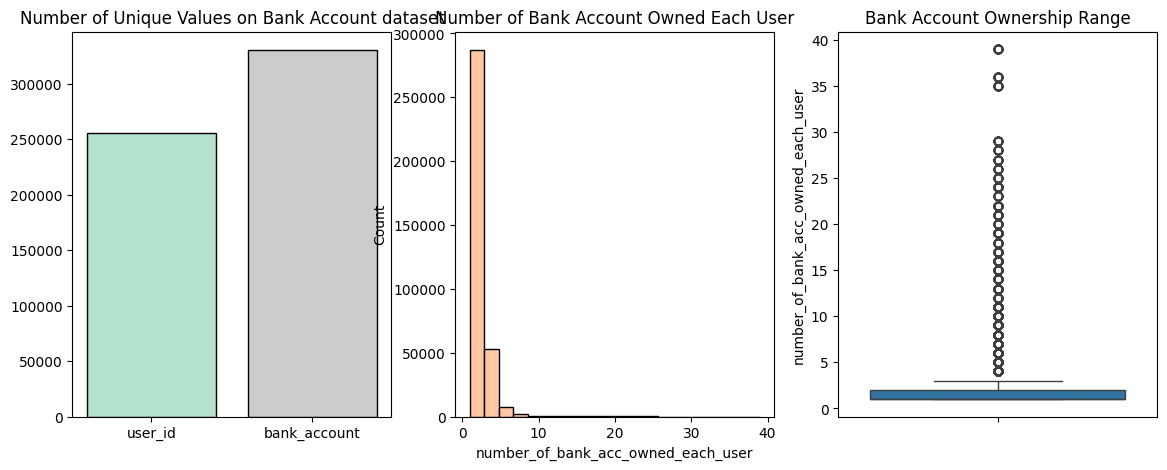

Bank Accounts Dataset : (350572, 3)


,user_id,bank_account,number_of_bank_acc_owned_each_user
0,C10000108,4042994223,1
1,C10000114,2222212388,1
2,C100001610,0294322322,1
3,C100001712,2990003333421,3
4,C100001712,392102029293829,3
...,...,...,...
350567,C99994206,2330024204482,1
350568,C99995186,332202092333821,1
350569,C99997576,2012380222,1
350570,C99998872,311202098483829,1


Average of Bank Account Ownership 1.8239562771698823
Number of user that has only 1 Bank Account : 187637
Number of user that has only 2 Bank Account : 99364
Number of user that has only 3 Bank Account : 38757
Number of user that has only 4 Bank Account : 14088
Number of user that has only 4 Bank Account : 5150
Maximum Bank Account Owned by User : 39
Each User on Average has 1-2 Bank Accounts


In [5]:
# ANALYSIS BANK ACCOUNT DATASET

cmap = plt.cm.Pastel2
plt.figure(figsize = (14, 5))

# PLOT UNIQUE VALUES EACH COLUMNS
plt.subplot(1, 3, 1)
unique_values = bank_accounts.nunique()
colors = cmap(np.linspace(0, 1, len(unique_values)))
plt.bar(x = unique_values.index, height = unique_values, color = colors, edgecolor = 'black')
plt.title('Number of Unique Values on Bank Account dataset')

# CREATE AND CHECK NUMBER OF BANK ACCOUNT OWNED FOR EACH USER
plt.subplot(1, 3, 2)
number_bank_accounts = bank_accounts.groupby('user_id')['bank_account'].count().reset_index(name = 'number_of_bank_acc_owned_each_user')
bank_accounts = pd.merge(left = bank_accounts, right = number_bank_accounts, on = 'user_id', how = 'outer')

sns.histplot(data = bank_accounts['number_of_bank_acc_owned_each_user'], kde = False, bins = 20, color = sns.color_palette("pastel")[1])
plt.title('Number of Bank Account Owned Each User')

# CHECK THE AVERAGE RANGE OF BANK ACCOUNT OWNERSHIP 
plt.subplot(1, 3, 3)
sns.boxplot(data = bank_accounts['number_of_bank_acc_owned_each_user'])
plt.title('Bank Account Ownership Range')
plt.show()

print(f'Bank Accounts Dataset : {bank_accounts.shape}')
display(bank_accounts)

print(f'Average of Bank Account Ownership {bank_accounts["number_of_bank_acc_owned_each_user"].mean()}')
print(f'Number of user that has only 1 Bank Account : {len(bank_accounts[bank_accounts["number_of_bank_acc_owned_each_user"] == 1])}')
print(f'Number of user that has only 2 Bank Account : {len(bank_accounts[bank_accounts["number_of_bank_acc_owned_each_user"] == 2])}')
print(f'Number of user that has only 3 Bank Account : {len(bank_accounts[bank_accounts["number_of_bank_acc_owned_each_user"] == 3])}')
print(f'Number of user that has only 4 Bank Account : {len(bank_accounts[bank_accounts["number_of_bank_acc_owned_each_user"] == 4])}')
print(f'Number of user that has only 4 Bank Account : {len(bank_accounts[bank_accounts["number_of_bank_acc_owned_each_user"] == 5])}')
print(f'Maximum Bank Account Owned by User : {bank_accounts["number_of_bank_acc_owned_each_user"].max()}')

q1 = int(bank_accounts['number_of_bank_acc_owned_each_user'].quantile(0.25))
q3 = int(bank_accounts['number_of_bank_acc_owned_each_user'].quantile(0.75))
print(f'Each User on Average has {q1}-{q3} Bank Accounts')

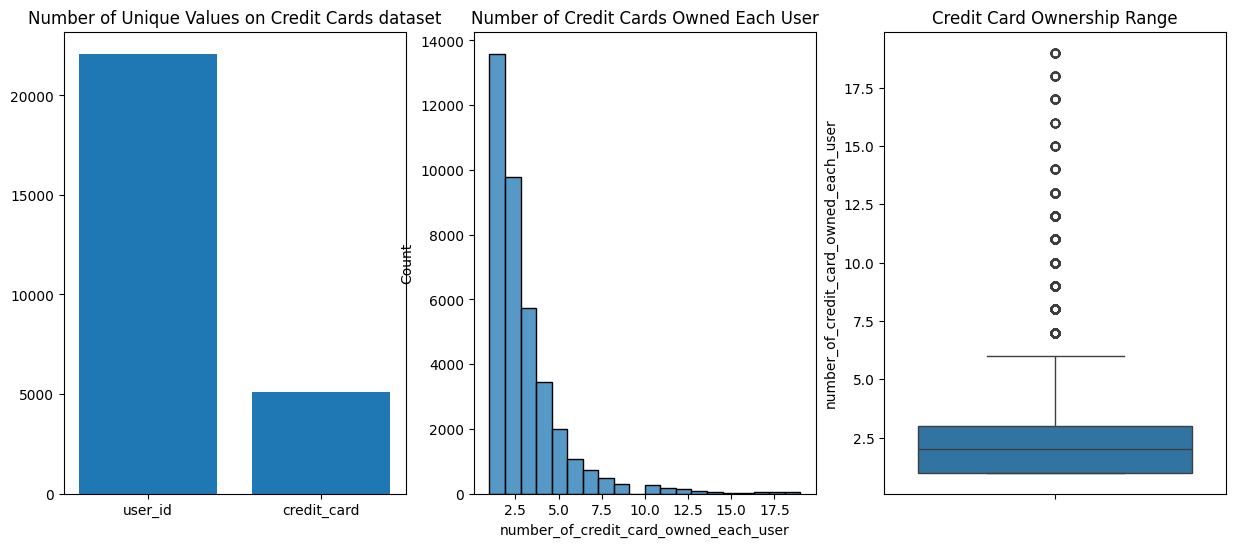

Credit Cards dataset : (38015, 3)


,user_id,credit_card,number_of_credit_card_owned_each_user
0,C10000114,83933x09-2020,1
1,C100007258,88992x08-2021,1
2,C100038898,83042x03-2022,1
3,C100042654,32300x02-2021,1
4,C10004324,32933x04-2019,2
...,...,...,...
38010,C9997318,83919x01-2021,1
38011,C9998480,38324x11-2020,2
38012,C9998480,38832x05-2019,2
38013,C99990,82122x06-2019,1


Average of Bank Account Ownership 2.7178482178087595
Number of user that has only 1 Credit Card : 13589
Number of user that has only 2 Credit Card : 9778
Number of user that has only 3 Credit Card : 5727
Number of user that has only 4 Credit Card : 3444
Number of user that has only 4 Credit Card : 2000
Maximum Credit Card Owned by User : 19
Each User on Average has 1-3 Credit Card


In [6]:
# ANALYSIS CREDIT CARDS

plt.figure(figsize = (15, 6))

# PLOT UNIQUE VALUES EACH COLUMNS
plt.subplot(1, 3, 1)
unique_values = credit_cards.nunique()
plt.bar(x = unique_values.index, height = unique_values)
plt.title('Number of Unique Values on Credit Cards dataset')

# CREATE AND CHECK NUMBER OF BANK ACCOUNT OWNED FOR EACH USER
plt.subplot(1, 3, 2)
number_credit_card = credit_cards.groupby('user_id')['credit_card'].count().reset_index(name = 'number_of_credit_card_owned_each_user')
credit_cards = pd.merge(left = credit_cards, right = number_credit_card, on = 'user_id', how = 'outer')
sns.histplot(credit_cards['number_of_credit_card_owned_each_user'], kde = False, bins = 20)
plt.title('Number of Credit Cards Owned Each User')

# CHECK THE AVERAGE RANGE OF BANK ACCOUNT OWNERSHIP 
plt.subplot(1, 3, 3)
sns.boxplot(data = credit_cards['number_of_credit_card_owned_each_user'])
plt.title('Credit Card Ownership Range')
plt.show()

print(f'Credit Cards dataset : {credit_cards.shape}')
display(credit_cards)

# ANALYSIS
print(f'Average of Bank Account Ownership {credit_cards["number_of_credit_card_owned_each_user"].mean()}')
print(f'Number of user that has only 1 Credit Card : {len(credit_cards[credit_cards["number_of_credit_card_owned_each_user"] == 1])}')
print(f'Number of user that has only 2 Credit Card : {len(credit_cards[credit_cards["number_of_credit_card_owned_each_user"] == 2])}')
print(f'Number of user that has only 3 Credit Card : {len(credit_cards[credit_cards["number_of_credit_card_owned_each_user"] == 3])}')
print(f'Number of user that has only 4 Credit Card : {len(credit_cards[credit_cards["number_of_credit_card_owned_each_user"] == 4])}')
print(f'Number of user that has only 4 Credit Card : {len(credit_cards[credit_cards["number_of_credit_card_owned_each_user"] == 5])}')
print(f'Maximum Credit Card Owned by User : {credit_cards["number_of_credit_card_owned_each_user"].max()}')

q1 = int(credit_cards['number_of_credit_card_owned_each_user'].quantile(0.25))
q3 = int(credit_cards['number_of_credit_card_owned_each_user'].quantile(0.75))
print(f'Each User on Average has {q1}-{q3} Credit Card')

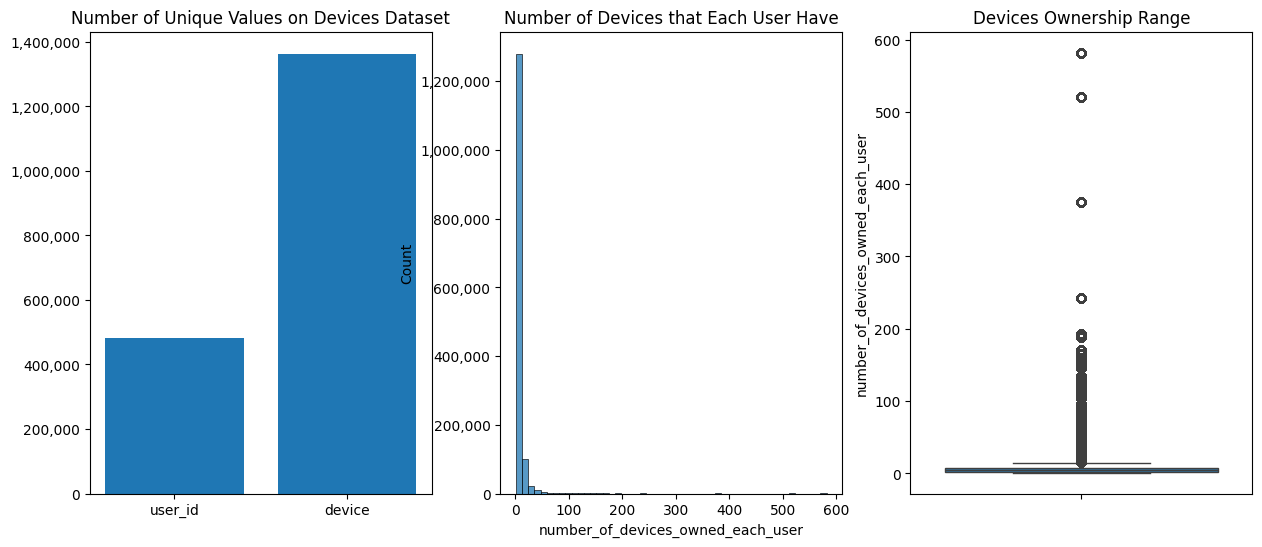

Devices Dataset : (1430311, 3)


,user_id,device,number_of_devices_owned_each_user
0,C100000188,KW3BXRU0mEUASwkqKE9RKMwzarRKcW0SFE7dKKE+7hg=,2
1,C100000188,eHamaEomkzg+ne4qKByVbyN6NRopJQMmhJtvKA40VWA=,2
2,C10000108,0I6FDl/Oz0Rbiw2odGruDDY9Ij9314zrIjcWXC12WsK=,3
3,C10000108,jgEIYeaS66VeaLLE04WncEvBoyvIGkG+NiIEZxyUiSq=,3
4,C10000108,qavseG3oXa2jIZtHFbYMPVMX1h/jix05xwcb7gW7rPE=,3
...,...,...,...
1430306,C99999032,4pmNGcmhvAB6GjD75Gi7EgDDdECVvAK/gy6IaqEZ6dy=,4
1430307,C99999032,Wnfml2o+6afJ6na51Dp5txLG3+HCpKD1oj/dH++5+HK=,4
1430308,C99999032,b4Tomt0/9G7PItK++Dj18+Ose9JWdN9sZdgWvZt6HZ0=,4
1430309,C9999922,e/nawC2zWGAi4w25EaNUcZzdG6BMwnDWO+eVey4EqMc=,2


Average of Devices Ownership 7.221265165408083
Number of User that only have 1 Devices : 159331
Number of User that only have 2 Devices : 254254
Number of User that only have 3 Devices : 223419
Number of User that only have 4 Devices : 169704
Number of User that only have 5 Devices : 127650
Number of User that only have 6 Devices : 94302
Number of User that only have 7 Devices : 72016
Each User on Average has 2-7 Devices


In [7]:
# ANALYSIS DEVICES

plt.figure(figsize = (15, 6))

# PLOT UNIQUE VALUES EACH COLUMNS
plt.subplot(1, 3, 1)
unique_values = devices.nunique()  #--> COUNT UNIQUE VALUE EACH COL
plt.bar(x = unique_values.index, height = unique_values)
plt.title('Number of Unique Values on Devices Dataset')
plt.gca().yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))

# PLOT NUMBER OF DEVICES EACH USER HAVE
plt.subplot(1, 3 ,2)
number_devices = devices.groupby('user_id')['device'].nunique().reset_index(name = 'number_of_devices_owned_each_user')  # CREATE NEW COL
devices = pd.merge(left = devices, right = number_devices, on = 'user_id', how = 'outer')
sns.histplot(data = devices['number_of_devices_owned_each_user'], bins = 50)  # --> PLOT DISTRIBUTION
plt.gca().yaxis.set_major_formatter(ticker.StrMethodFormatter(fmt = '{x:,.0f}'))
plt.title('Number of Devices that Each User Have')

# CHECK THE AVERAGE RANGE OF BANK ACCOUNT OWNERSHIP 
plt.subplot(1, 3, 3)
sns.boxplot(data = devices['number_of_devices_owned_each_user'])
plt.title('Devices Ownership Range')
plt.show()

print(f'Devices Dataset : {devices.shape}')
display(devices)

# ANALYSIS
print(f'Average of Devices Ownership {devices["number_of_devices_owned_each_user"].mean()}')
print(f'Number of User that only have 1 Devices : {len(devices[devices["number_of_devices_owned_each_user"] == 1])}')
print(f'Number of User that only have 2 Devices : {len(devices[devices["number_of_devices_owned_each_user"] == 2])}')
print(f'Number of User that only have 3 Devices : {len(devices[devices["number_of_devices_owned_each_user"] == 3])}')
print(f'Number of User that only have 4 Devices : {len(devices[devices["number_of_devices_owned_each_user"] == 4])}')
print(f'Number of User that only have 5 Devices : {len(devices[devices["number_of_devices_owned_each_user"] == 5])}')
print(f'Number of User that only have 6 Devices : {len(devices[devices["number_of_devices_owned_each_user"] == 6])}')
print(f'Number of User that only have 7 Devices : {len(devices[devices["number_of_devices_owned_each_user"] == 7])}')


q1 = int(devices['number_of_devices_owned_each_user'].quantile(0.25))
q3 = int(devices['number_of_devices_owned_each_user'].quantile(0.75))
print(f'Each User on Average has {q1}-{q3} Devices')

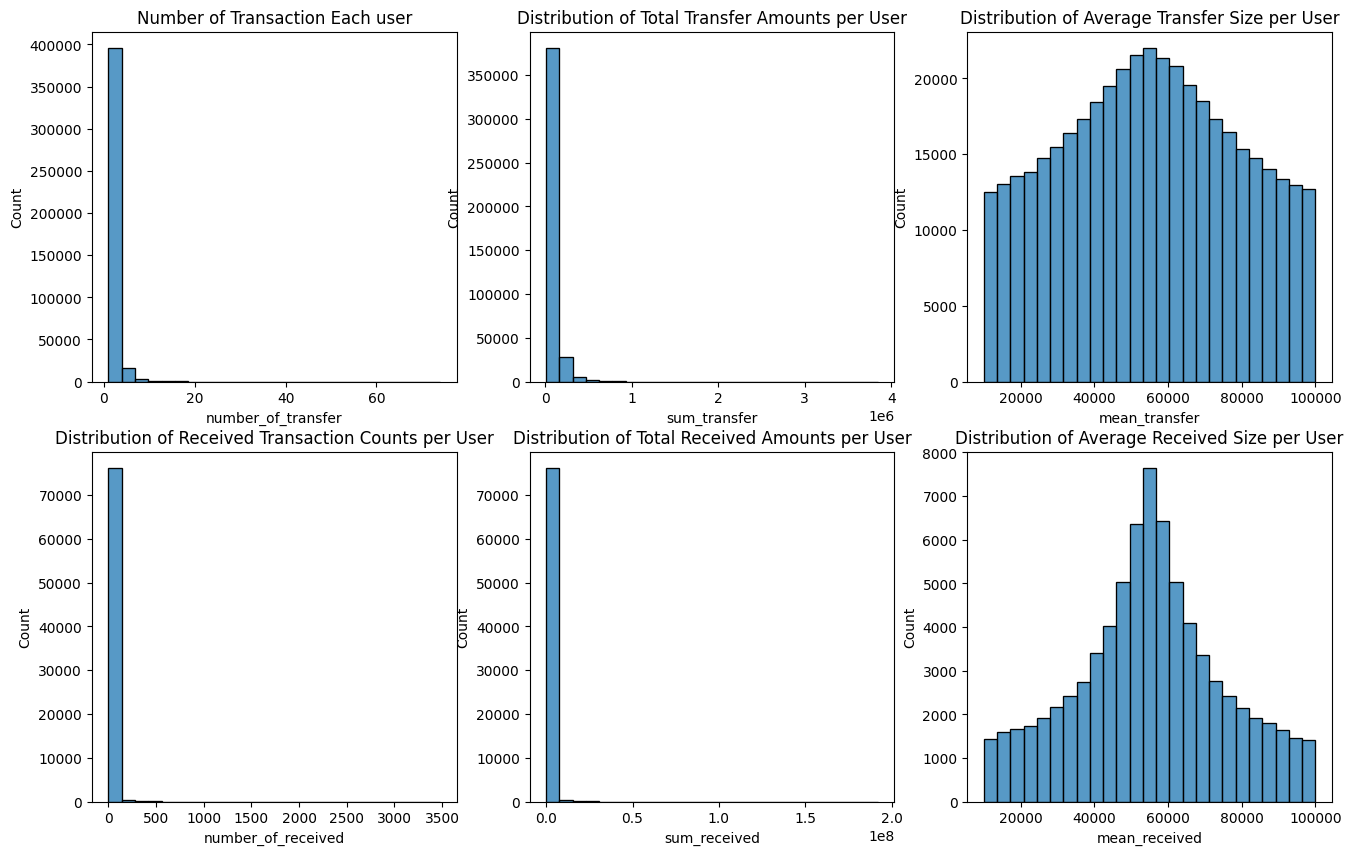

Transactions dataset : (486277, 7)


,user_id,number_of_transfer,sum_transfer,mean_transfer,number_of_received,sum_received,mean_received
0,C100000188,1.0,44574.0,44574.0,NaN,NaN,NaN
1,C10000108,1.0,20156.0,20156.0,NaN,NaN,NaN
2,C10000114,NaN,NaN,NaN,340.0,19014251.0,55924.267647
3,C100001610,1.0,54207.0,54207.0,NaN,NaN,NaN
4,C100001712,5.0,139464.0,27892.8,NaN,NaN,NaN
...,...,...,...,...,...,...,...
486272,C99995312,1.0,60253.0,60253.0,NaN,NaN,NaN
486273,C99997576,NaN,NaN,NaN,2.0,66303.0,33151.500000
486274,C99998872,1.0,63551.0,63551.0,NaN,NaN,NaN
486275,C99999032,2.0,67297.0,33648.5,NaN,NaN,NaN


Average Number of Transferred each User : 1.4922843993703512
Number of User who Transferred less than 10 : 414671
Number of User who Transferred more than 20 : 85
Most Transfer who made by user : 74.0
Users with the lowest transaction amount : ['C13621586', 'C232042894', 'C54041500', 'C6393802', 'C78527156'] with 10000.0 Amount
Users with the highest transaction amount : ['C187679100'] with 3843689.0 Amount
User id who make the most Transfer : C187679100
Each User on Average makes 1-2 Transactions

The average number of transaction recipients per user : 8.101598277774153
Number of User who receive less than 10 Transactions : 66142
Number of User who receive more than 20 Transactions : 5270
Most Transfer who made by user : 3478.0
Users with the lowest received amount : ['C19209936', 'C51455288'] with 10002.0 Amount
Users with the highest transaction amount : ['C102234504'] with 191868023.0 Amount
User id who had the most recipient : C102234504
On averages, each user receives 1-5 Transac

In [8]:
# ANALYSIS TRANSACTIONS DATASET

# FIRST, RENAME A COLUMNS
transactions = transactions.rename(columns = {'org_user_id' : 'sender_id', 'dest_user_id' : 'receiver_id'})

# IDENTIFY SENDER AND RECEIVER FROM TRANSACTION DATASET
sender_summary = transactions.groupby('sender_id')['amount'].agg(['count', 'sum', 'mean']).reset_index().rename(columns = {'sender_id' : 'user_id', 
                                                                                                                         'count' : 'number_of_transfer', 
                                                                                                                         'sum' : 'sum_transfer', 
                                                                                                                         'mean' : 'mean_transfer'})

receiver_summary = transactions.groupby('receiver_id')['amount'].agg(['count', 'sum', 'mean']).reset_index().rename(columns = {'receiver_id' : 'user_id',
                                                                                                                               'count' : 'number_of_received',
                                                                                                                               'sum' : 'sum_received',
                                                                                                                               'mean' : 'mean_received'})

# MERGE SENT AND RECEIVER
transactions = pd.merge(left = sender_summary, right = receiver_summary, how = 'outer', on = 'user_id')

# PLOT DISTRIBUTION
def plot_distribution(data, bins, title = None, subplot = (1, 1, 1)):

    plt.subplot(*subplot)
    sns.histplot(data = data, bins = bins)
    plt.title(title)

plt.figure(figsize = (16, 10))
plot_distribution(data = transactions['number_of_transfer'], bins = 25, title = 'Number of Transaction Each user', subplot = (2, 3, 1))
plot_distribution(data = transactions['sum_transfer'], bins = 25, title = 'Distribution of Total Transfer Amounts per User', subplot = (2, 3, 2))
plot_distribution(data = transactions['mean_transfer'], bins = 25, title = 'Distribution of Average Transfer Size per User', subplot = (2, 3, 3))
plot_distribution(data = transactions['number_of_received'], bins = 25, title = 'Distribution of Received Transaction Counts per User', subplot = (2, 3, 4))
plot_distribution(data = transactions['sum_received'], bins = 25, title = 'Distribution of Total Received Amounts per User', subplot = (2, 3, 5))
plot_distribution(data = transactions['mean_received'], bins = 25, title = 'Distribution of Average Received Size per User', subplot = (2, 3, 6))
plt.show()

print(f'Transactions dataset : {transactions.shape}')
display(transactions)

# ANALYSIS NUMBER OF TRANSACTIONS
print(f'Average Number of Transferred each User : {transactions["number_of_transfer"].mean()}')
print(f'Number of User who Transferred less than 10 : {len(transactions[transactions["number_of_transfer"] < 10])}')
print(f'Number of User who Transferred more than 20 : {len(transactions[transactions["number_of_transfer"] > 20])}')
print(f'Most Transfer who made by user : {transactions["number_of_transfer"].max()}')

min_amount = transactions['sum_transfer'].min()
max_amount = transactions['sum_transfer'].max()
print(f'Users with the lowest transaction amount : {transactions[transactions["sum_transfer"] == min_amount]["user_id"].tolist()} with {min_amount} Amount')
print(f'Users with the highest transaction amount : {transactions[transactions["sum_transfer"] == max_amount]["user_id"].tolist()} with {max_amount} Amount')
print(f'User id who make the most Transfer : {transactions.loc[transactions["number_of_transfer"].idxmax(), "user_id"]}')

q1 = int(transactions['number_of_transfer'].quantile(0.25))
q3 = int(transactions['number_of_transfer'].quantile(0.75))
print(f'Each User on Average makes {q1}-{q3} Transactions')

# ANALYSIS NUMBER OF RECEIVERS
print(f'\nThe average number of transaction recipients per user : {transactions["number_of_received"].mean()}')
print(f'Number of User who receive less than 10 Transactions : {len(transactions[transactions["number_of_received"] < 10])}')
print(f'Number of User who receive more than 20 Transactions : {len(transactions[transactions["number_of_received"] > 20])}')
print(f'Most Transfer who made by user : {transactions["number_of_received"].max()}')

min_amount = transactions['sum_received'].min()
max_amount = transactions['sum_received'].max()
print(f'Users with the lowest received amount : {transactions[transactions["sum_received"] == min_amount]["user_id"].tolist()} with {min_amount} Amount')
print(f'Users with the highest transaction amount : {transactions[transactions["sum_received"] == max_amount]["user_id"].tolist()} with {max_amount} Amount')
print(f'User id who had the most recipient : {transactions.loc[transactions["number_of_received"].idxmax(), "user_id"]}')

q1 = int(transactions['number_of_received'].quantile(0.25))
q3 = int(transactions['number_of_received'].quantile(0.75))
print(f'On averages, each user receives {q1}-{q3} Transactions')

In [9]:
# DROP DEVICE COLUMN
devices = devices.drop(columns = 'device')

devices

,user_id,number_of_devices_owned_each_user
0,C100000188,2
1,C100000188,2
2,C10000108,3
3,C10000108,3
4,C10000108,3
...,...,...
1430306,C99999032,4
1430307,C99999032,4
1430308,C99999032,4
1430309,C9999922,2


In [10]:
# MERGE DATASET

# MERGE BANK ACOUNT, CREDIT CARDS AND DEVICES
user_profile = pd.merge(left = bank_accounts, right = credit_cards, how = 'outer', on = 'user_id').merge(right = devices, on = 'user_id', how = 'outer')

# MERGE THEM WITH TRANSACTIONS DATASET
user_profile = pd.merge(left = user_profile, right = transactions, on = 'user_id', how = 'outer')

# DROP DUPLICATES
user_profile = user_profile.drop_duplicates()

user_profile

,user_id,bank_account,number_of_bank_acc_owned_each_user,credit_card,number_of_credit_card_owned_each_user,number_of_devices_owned_each_user,number_of_transfer,sum_transfer,mean_transfer,number_of_received,sum_received,mean_received
0,C100000188,NaN,NaN,NaN,NaN,2.0,1.0,44574.0,44574.0,NaN,NaN,NaN
2,C10000108,4042994223,1.0,NaN,NaN,3.0,1.0,20156.0,20156.0,NaN,NaN,NaN
5,C10000114,2222212388,1.0,83933x09-2020,1.0,14.0,NaN,NaN,NaN,340.0,19014251.0,55924.267647
19,C100001610,0294322322,1.0,NaN,NaN,2.0,1.0,54207.0,54207.0,NaN,NaN,NaN
21,C100001712,2990003333421,3.0,NaN,NaN,6.0,5.0,139464.0,27892.8,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
2061321,C99995312,NaN,NaN,NaN,NaN,2.0,1.0,60253.0,60253.0,NaN,NaN,NaN
2061323,C99997576,2012380222,1.0,33238x06-2019,1.0,1.0,NaN,NaN,NaN,2.0,66303.0,33151.500000
2061324,C99998872,311202098483829,1.0,NaN,NaN,2.0,1.0,63551.0,63551.0,NaN,NaN,NaN
2061326,C99999032,NaN,NaN,NaN,NaN,4.0,2.0,67297.0,33648.5,NaN,NaN,NaN


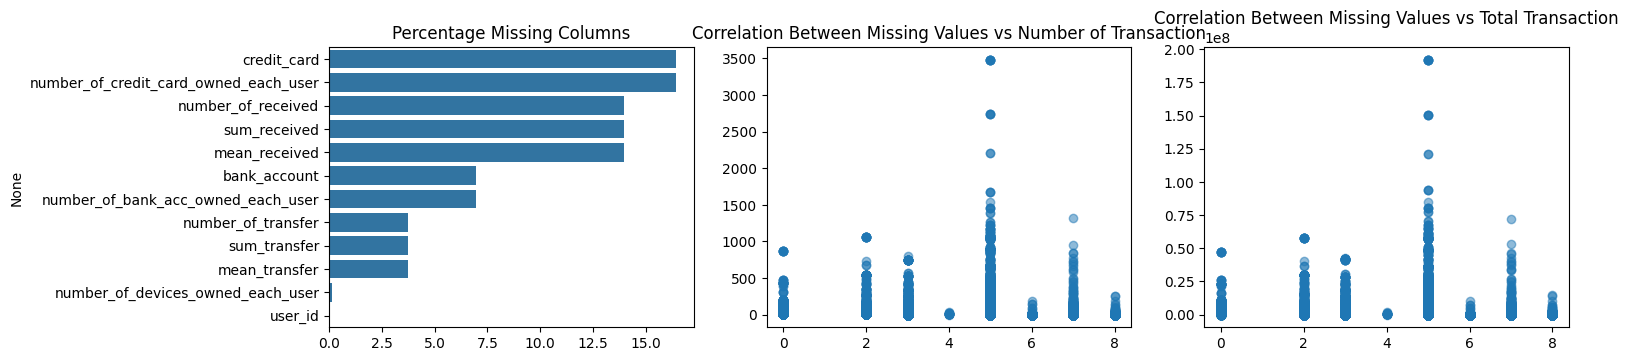

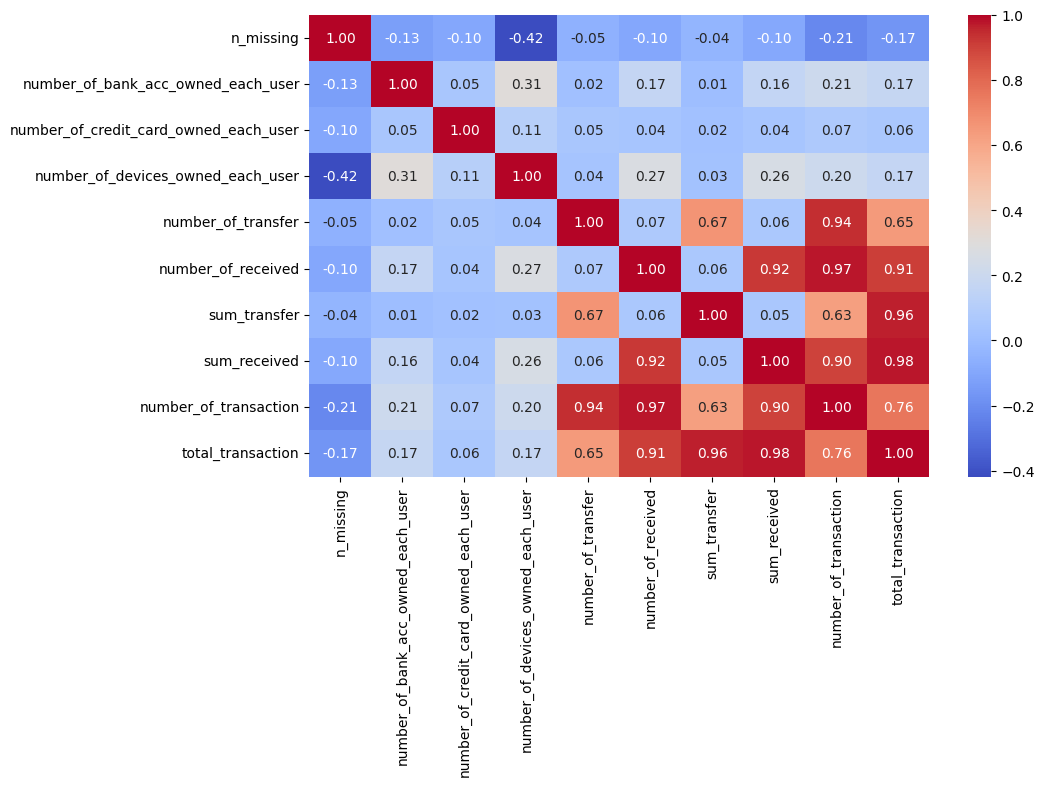

In [11]:
# ANALYSIS ON USER PROFILE DATASET (MERGED DATASET)

plt.figure(figsize = (16, 8))

# PERCENTAGE MISSING COLUMNS
plt.subplot(2, 3, 1)
missing_col = user_profile.isna().sum()
total_missing = user_profile.isna().sum().sum()
percentage_missing = (missing_col / total_missing * 100).round(2).sort_values(ascending = False)
sns.barplot(x = percentage_missing.values, y = percentage_missing.index)
plt.title('Percentage Missing Columns')


# ANALYSIS MISSING VALUES VS TRANSACTION ACTIVITIES
user_profile['n_missing'] = user_profile.isna().sum(axis = 1)
user_profile['number_of_transaction'] = user_profile[['number_of_transfer', 'number_of_received']].sum(axis = 1, skipna = True)
user_profile['total_transaction'] = user_profile[['sum_transfer', 'sum_received']].sum(axis = 1, skipna = True)

plt.subplot(2, 3, 2)
plt.scatter(x = user_profile['n_missing'], y = user_profile['number_of_transaction'], alpha = 0.5)
plt.title('Correlation Between Missing Values vs Number of Transaction')

plt.subplot(2, 3, 3)
plt.scatter(x = user_profile['n_missing'], y = user_profile['total_transaction'], alpha = 0.5)
plt.title('Correlation Between Missing Values vs Total Transaction')
plt.show()

# ANALYSIS HOW STRONG MISSING VALUES AFFECT ON TRANSACTION
plt.figure(figsize = (10, 6))
missing_corr = user_profile[['n_missing', 'number_of_bank_acc_owned_each_user', 'number_of_credit_card_owned_each_user', 'number_of_devices_owned_each_user', 'number_of_transfer',
                             'number_of_received', 'sum_transfer', 'sum_received', 'number_of_transaction', 'total_transaction']].corr(method = 'spearman')
sns.heatmap(data = missing_corr, cmap = 'coolwarm', annot = True, fmt = '.2f')
plt.show()

In [12]:
# SPLIT DATA

FEATURES = ['number_of_bank_acc_owned_each_user', 'number_of_credit_card_owned_each_user', 'number_of_devices_owned_each_user', 'number_of_transfer', 'number_of_received',
            'sum_transfer', 'sum_received', 'number_of_transaction', 'total_transaction', 'n_missing']

x = user_profile[FEATURES]

# FILL NULL VALUE WITH 0 BECAUSE ISOLATION FOREST DOESNT ACCEPT MISSING VALUES
x = x.fillna(0)

# DROP DUPLICATE VALUE
x_train = x.drop_duplicates()

x_train

,number_of_bank_acc_owned_each_user,number_of_credit_card_owned_each_user,number_of_devices_owned_each_user,number_of_transfer,number_of_received,sum_transfer,sum_received,number_of_transaction,total_transaction,n_missing
0,0.0,0.0,2.0,1.0,0.0,44574.0,0.0,1.0,44574.0,7
2,1.0,0.0,3.0,1.0,0.0,20156.0,0.0,1.0,20156.0,5
5,1.0,1.0,14.0,0.0,340.0,0.0,19014251.0,340.0,19014251.0,3
19,1.0,0.0,2.0,1.0,0.0,54207.0,0.0,1.0,54207.0,5
21,3.0,0.0,6.0,5.0,0.0,139464.0,0.0,5.0,139464.0,5
...,...,...,...,...,...,...,...,...,...,...
2061319,1.0,0.0,2.0,1.0,0.0,37829.0,0.0,1.0,37829.0,5
2061323,1.0,1.0,1.0,0.0,2.0,0.0,66303.0,2.0,66303.0,3
2061324,1.0,0.0,2.0,1.0,0.0,63551.0,0.0,1.0,63551.0,5
2061326,0.0,0.0,4.0,2.0,0.0,67297.0,0.0,2.0,67297.0,7


In [14]:
# TRAIN MODEL ISOLATION FOREST - BASELINE

model = IsolationForest(n_estimators = 1000, 
                        contamination = 0.01,
                        random_state = 2025)
model.fit(x)

,n_estimators,1000
,max_samples,'auto'
,contamination,0.01
,max_features,1.0
,bootstrap,False
,n_jobs,None
,random_state,2025
,verbose,0
,warm_start,False


In [15]:
# PREDICT MODEL

user_profile['anomaly_score'] = model.decision_function(x) # --> GET ANOMALY SCORE (IF SCORE IS NEGATIVE, THEN IT CATEGORIZE AS ANOMALY)
user_profile['is_anomaly']    = model.predict(x)   # --> GET LABEL (-1 = ANOMALY, 1 = NORMAL)

print(f'User Profile : {user_profile.shape}')
user_profile

User Profile : (604444, 17)


,user_id,bank_account,number_of_bank_acc_owned_each_user,credit_card,number_of_credit_card_owned_each_user,number_of_devices_owned_each_user,number_of_transfer,sum_transfer,mean_transfer,number_of_received,sum_received,mean_received,n_missing,number_of_transaction,total_transaction,anomaly_score,is_anomaly
0,C100000188,NaN,NaN,NaN,NaN,2.0,1.0,44574.0,44574.0,NaN,NaN,NaN,7,1.0,44574.0,0.346838,1
2,C10000108,4042994223,1.0,NaN,NaN,3.0,1.0,20156.0,20156.0,NaN,NaN,NaN,5,1.0,20156.0,0.350964,1
5,C10000114,2222212388,1.0,83933x09-2020,1.0,14.0,NaN,NaN,NaN,340.0,19014251.0,55924.267647,3,340.0,19014251.0,-0.104572,-1
19,C100001610,0294322322,1.0,NaN,NaN,2.0,1.0,54207.0,54207.0,NaN,NaN,NaN,5,1.0,54207.0,0.355964,1
21,C100001712,2990003333421,3.0,NaN,NaN,6.0,5.0,139464.0,27892.8,NaN,NaN,NaN,5,5.0,139464.0,0.208779,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2061321,C99995312,NaN,NaN,NaN,NaN,2.0,1.0,60253.0,60253.0,NaN,NaN,NaN,7,1.0,60253.0,0.347740,1
2061323,C99997576,2012380222,1.0,33238x06-2019,1.0,1.0,NaN,NaN,NaN,2.0,66303.0,33151.500000,3,2.0,66303.0,0.235865,1
2061324,C99998872,311202098483829,1.0,NaN,NaN,2.0,1.0,63551.0,63551.0,NaN,NaN,NaN,5,1.0,63551.0,0.355894,1
2061326,C99999032,NaN,NaN,NaN,NaN,4.0,2.0,67297.0,33648.5,NaN,NaN,NaN,7,2.0,67297.0,0.306316,1


In [23]:
# SAVE NEW DATA 
user_profile.to_csv(r'data/user_profile.csv', index = False)

In [16]:
# DISPLAY ANOMALY USER

user_anomaly = user_profile[user_profile['anomaly_score'] < 0].sort_values(by = ['anomaly_score'], ascending = True)  #--> GET THE MOST ANOMALY
user_anomaly = user_anomaly.drop_duplicates(subset = 'user_id')   # --> ONLY SELECT 1 USER_ID PER ANOMALY

user_anomaly

,user_id,bank_account,number_of_bank_acc_owned_each_user,credit_card,number_of_credit_card_owned_each_user,number_of_devices_owned_each_user,number_of_transfer,sum_transfer,mean_transfer,number_of_received,sum_received,mean_received,n_missing,number_of_transaction,total_transaction,anomaly_score,is_anomaly
974215,C23739996,3240339933,5.0,82122x08-2018,3.0,18.0,9.0,579239.0,64359.888889,425.0,22616134.0,53214.432941,0,434.0,23195373.0,-0.153822,-1
2017251,C9516814,3120282443,2.0,88204x12-2018,2.0,5.0,21.0,1175894.0,55994.952381,284.0,14896503.0,52452.475352,0,305.0,16072397.0,-0.143650,-1
492963,C16017210,2340330882,4.0,33240x02-2022,2.0,15.0,3.0,249482.0,83160.666667,870.0,46640451.0,53609.713793,0,873.0,46889933.0,-0.139151,-1
1941353,C8767344,2199808009,39.0,NaN,NaN,43.0,NaN,NaN,NaN,490.0,26424042.0,53926.616327,5,490.0,26424042.0,-0.138575,-1
1633329,C61338404,0341009100,5.0,38832x09-2021,1.0,35.0,2.0,139184.0,69592.000000,471.0,25965277.0,55127.976645,0,473.0,26104461.0,-0.138386,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021113,C95633354,200302092394822,2.0,NaN,NaN,7.0,23.0,1320054.0,57393.652174,NaN,NaN,NaN,5,23.0,1320054.0,-0.000155,-1
1910556,C8431322,2240004230212,2.0,NaN,NaN,16.0,NaN,NaN,NaN,53.0,2903531.0,54783.603774,5,53.0,2903531.0,-0.000099,-1
728836,C195161048,NaN,NaN,NaN,NaN,3.0,16.0,943683.0,58980.187500,NaN,NaN,NaN,7,16.0,943683.0,-0.000070,-1
1655211,C62795594,3338203841,1.0,NaN,NaN,3.0,NaN,NaN,NaN,65.0,3379120.0,51986.461538,5,65.0,3379120.0,-0.000056,-1


In [17]:
# DISPLAY TOP 10 ANOMALY USER

user_anomaly[0:10]

,user_id,bank_account,number_of_bank_acc_owned_each_user,credit_card,number_of_credit_card_owned_each_user,number_of_devices_owned_each_user,number_of_transfer,sum_transfer,mean_transfer,number_of_received,sum_received,mean_received,n_missing,number_of_transaction,total_transaction,anomaly_score,is_anomaly
974215,C23739996,3240339933,5.0,82122x08-2018,3.0,18.0,9.0,579239.0,64359.888889,425.0,22616134.0,53214.432941,0,434.0,23195373.0,-0.153822,-1
2017251,C9516814,3120282443,2.0,88204x12-2018,2.0,5.0,21.0,1175894.0,55994.952381,284.0,14896503.0,52452.475352,0,305.0,16072397.0,-0.143650,-1
492963,C16017210,2340330882,4.0,33240x02-2022,2.0,15.0,3.0,249482.0,83160.666667,870.0,46640451.0,53609.713793,0,873.0,46889933.0,-0.139151,-1
1941353,C8767344,2199808009,39.0,NaN,NaN,43.0,NaN,NaN,NaN,490.0,26424042.0,53926.616327,5,490.0,26424042.0,-0.138575,-1
1633329,C61338404,0341009100,5.0,38832x09-2021,1.0,35.0,2.0,139184.0,69592.000000,471.0,25965277.0,55127.976645,0,473.0,26104461.0,-0.138386,-1
768822,C2019758,83202000038832,29.0,NaN,NaN,14.0,2.0,90720.0,45360.000000,540.0,29357763.0,54366.227778,2,542.0,29448483.0,-0.136915,-1
3350,C10032756,3212398329,10.0,NaN,NaN,19.0,1.0,42792.0,42792.000000,1054.0,57977849.0,55007.446869,2,1055.0,58020641.0,-0.136532,-1
89663,C1089504,2290020249944,24.0,NaN,NaN,17.0,NaN,NaN,NaN,893.0,48789856.0,54635.896976,5,893.0,48789856.0,-0.135122,-1
897953,C2264618,0309021001,1.0,33384x08-2021,19.0,12.0,9.0,516077.0,57341.888889,91.0,5061833.0,55624.538462,0,100.0,5577910.0,-0.133713,-1
1835597,C7785870,3900999998,10.0,NaN,NaN,50.0,NaN,NaN,NaN,432.0,24585025.0,56909.780093,5,432.0,24585025.0,-0.131997,-1


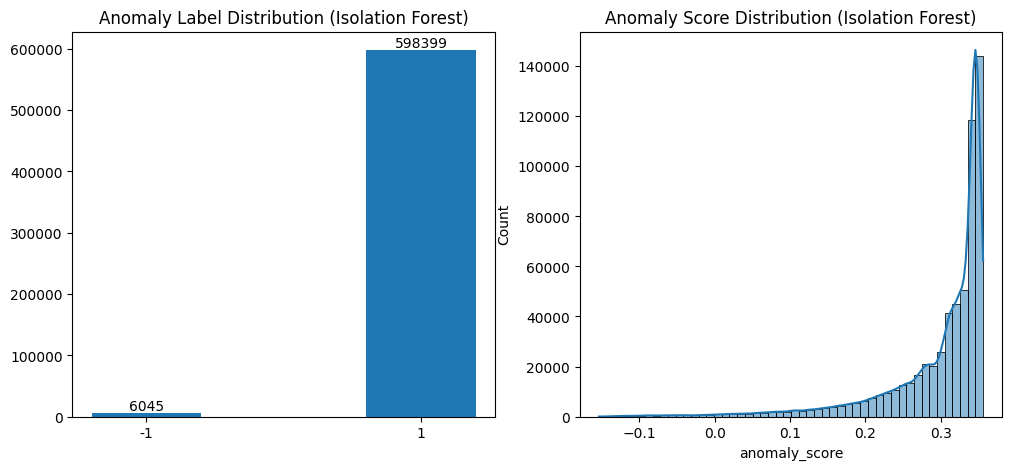

In [18]:
# CHECK DISTRIBUTION OF ANOMALY

plt.figure(figsize = (12, 5))

# GROUPBY ANOMALY LABEL
plt.subplot(1, 2, 1)
anomaly_label = user_profile.groupby(by = 'is_anomaly')['is_anomaly'].count()
bars = plt.bar(x = anomaly_label.index, height = anomaly_label.values)   

plt.xticks(anomaly_label.index, anomaly_label.index)  # --> X AXIS CONTAIN TRUE LABEL, NOT INTERVAL

# GET LABEL TEXT EACH BAR
for bar in bars:
    plt.text(x = bar.get_x() + bar.get_width() / 2, 
             y = bar.get_height(),
             s = str(bar.get_height()),
             ha = 'center', 
             va = 'bottom')
plt.title('Anomaly Label Distribution (Isolation Forest)')

plt.subplot(1, 2, 2)
sns.histplot(user_profile['anomaly_score'], kde = True, bins = 50)
plt.title('Anomaly Score Distribution (Isolation Forest)')

plt.show()

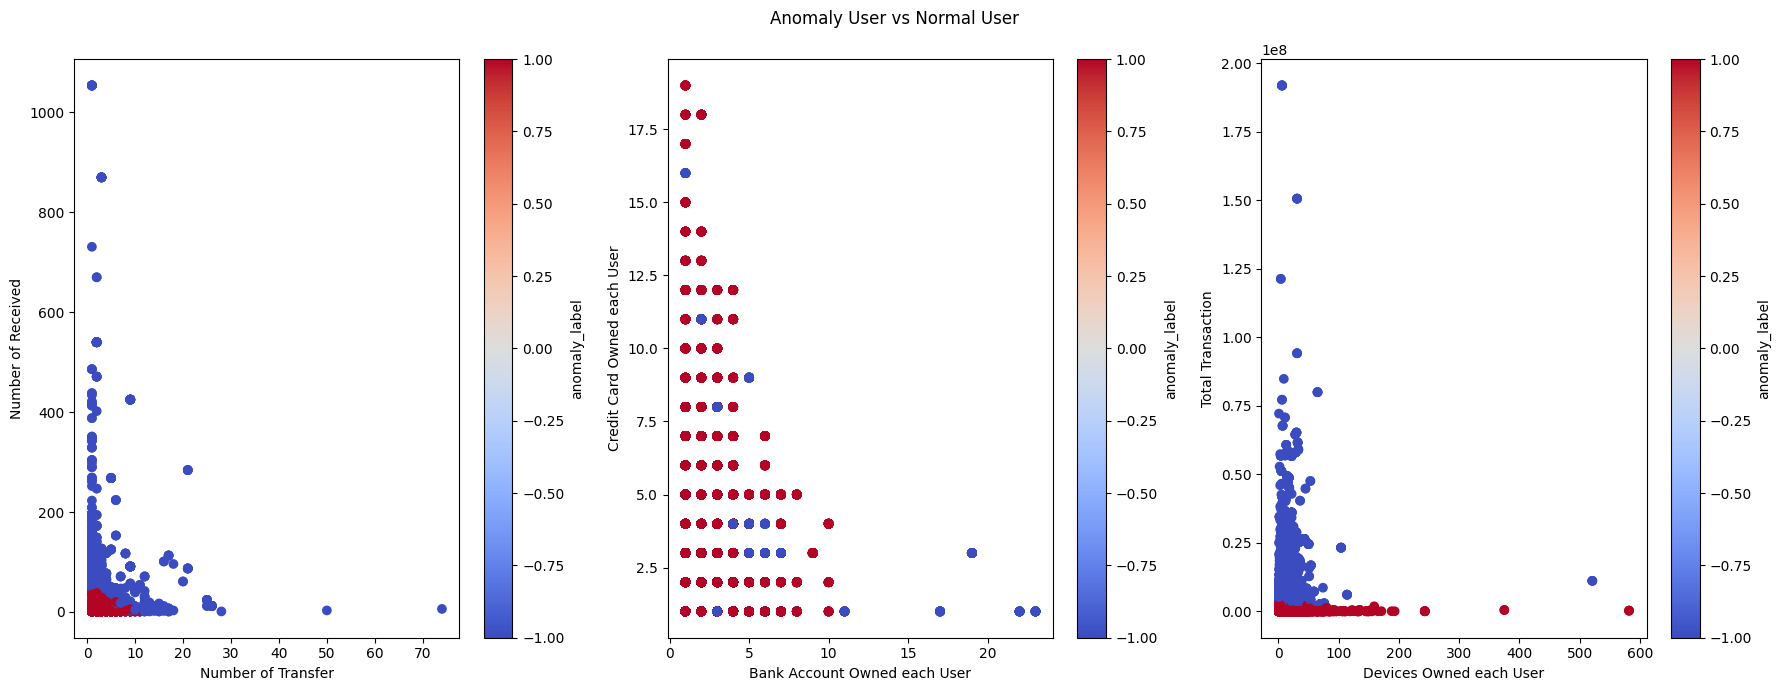

In [20]:
# ANOMALY VS NORMAL USER 

plt.figure(figsize = (18, 7))

# NUMBER OF TRANSFER VS NUMBER OF RECEIVED USER ANOMALY
plt.subplot(1, 3, 1)
plt.scatter(x = user_profile['number_of_transfer'], y = user_profile['number_of_received'], c = user_profile['is_anomaly'], cmap = 'coolwarm')
plt.colorbar(label = 'anomaly_label')
plt.xlabel('Number of Transfer')
plt.ylabel('Number of Received')

plt.subplot(1, 3, 2)
plt.scatter(x = user_profile['number_of_bank_acc_owned_each_user'], y = user_profile['number_of_credit_card_owned_each_user'], c = user_profile['is_anomaly'], cmap = 'coolwarm')
plt.colorbar(label = 'anomaly_label')
plt.xlabel('Bank Account Owned each User')
plt.ylabel('Credit Card Owned each User')

plt.subplot(1, 3, 3)
plt.scatter(x = user_profile['number_of_devices_owned_each_user'], y = user_profile['total_transaction'], c = user_profile['is_anomaly'], cmap = 'coolwarm')
plt.colorbar(label = 'anomaly_label')
plt.xlabel('Devices Owned each User')
plt.ylabel('Total Transaction')

plt.suptitle('Anomaly User vs Normal User')
plt.tight_layout()
plt.show()

In [21]:
# STATISTIK ANOMALY USER VS NORMAL USER

print('Statistic Normal User : ')
normal_stats = user_profile[user_profile['is_anomaly'] == 1].describe()
display(normal_stats)

print('\nStatistic Anomaly User : ')
anomaly_stats = user_profile[user_profile['is_anomaly'] == -1].describe()
display(anomaly_stats)

Statistic Normal User : 


,number_of_bank_acc_owned_each_user,number_of_credit_card_owned_each_user,number_of_devices_owned_each_user,number_of_transfer,sum_transfer,mean_transfer,number_of_received,sum_received,mean_received,n_missing,number_of_transaction,total_transaction,anomaly_score,is_anomaly
count,365181.000000,52095.000000,593237.000000,478215.000000,4.782150e+05,478215.000000,131920.000000,1.319200e+05,131920.000000,598399.000000,598399.000000,5.983990e+05,598399.000000,598399.0
mean,1.785167,2.728266,3.345735,1.493171,8.210586e+04,54966.136724,4.749742,2.610961e+05,55016.761043,5.555148,2.240383,1.231754e+05,0.300878,1.0
std,1.290514,2.235481,4.044880,1.187763,7.264777e+04,23879.576163,7.596067,4.200418e+05,19991.699393,1.319972,3.982867,2.217650e+05,0.065628,0.0
min,1.000000,1.000000,1.000000,1.000000,1.000000e+04,10000.000000,1.000000,1.000200e+04,10002.000000,0.000000,1.000000,1.000000e+04,0.000011,1.0
25%,1.000000,1.000000,1.000000,1.000000,3.994500e+04,36113.000000,1.000000,5.807250e+04,42658.000000,5.000000,1.000000,4.306600e+04,0.282112,1.0
50%,1.000000,2.000000,2.000000,1.000000,6.804400e+04,54981.000000,2.000000,9.824050e+04,55006.937500,5.000000,1.000000,7.361200e+04,0.327209,1.0
75%,2.000000,3.000000,4.000000,2.000000,9.447400e+04,73739.000000,5.000000,2.563970e+05,67447.500000,7.000000,2.000000,1.081255e+05,0.345073,1.0
max,35.000000,19.000000,582.000000,24.000000,1.356025e+06,99999.000000,67.000000,3.775724e+06,99999.000000,8.000000,67.000000,3.775724e+06,0.355615,1.0



Statistic Anomaly User : 


,number_of_bank_acc_owned_each_user,number_of_credit_card_owned_each_user,number_of_devices_owned_each_user,number_of_transfer,sum_transfer,mean_transfer,number_of_received,sum_received,mean_received,n_missing,number_of_transaction,total_transaction,anomaly_score,is_anomaly
count,5761.000000,1857.000000,6020.000000,1841.000000,1.841000e+03,1841.000000,5826.000000,5.826000e+03,5826.000000,6045.000000,6045.000000,6.045000e+03,6045.000000,6045.0
mean,5.386738,3.911147,11.849003,5.669745,3.185621e+05,57259.775813,160.002575,8.797065e+06,55058.352343,3.678743,155.932672,8.575381e+06,-0.055628,-1.0
std,6.601299,3.509097,15.490345,8.450598,4.705466e+05,18544.631137,234.843478,1.292145e+07,3592.634919,1.894562,231.671986,1.274630e+07,0.038440,0.0
min,1.000000,1.000000,1.000000,1.000000,1.011800e+04,10118.000000,1.000000,1.261400e+04,12614.000000,0.000000,8.000000,4.376650e+05,-0.151931,-1.0
25%,2.000000,2.000000,5.000000,1.000000,6.445300e+04,46431.500000,57.000000,3.097108e+06,53391.865672,2.000000,53.000000,2.914557e+06,-0.085222,-1.0
50%,3.000000,3.000000,8.000000,2.000000,9.705700e+04,56699.117647,89.000000,4.890919e+06,55064.177143,5.000000,87.000000,4.783249e+06,-0.050646,-1.0
75%,5.000000,5.000000,15.000000,7.000000,4.175500e+05,66263.000000,163.000000,8.937868e+06,56684.059783,5.000000,159.000000,8.669007e+06,-0.020913,-1.0
max,39.000000,19.000000,521.000000,74.000000,3.843689e+06,99992.000000,3478.000000,1.918680e+08,91848.000000,8.000000,3478.000000,1.918680e+08,-0.000008,-1.0


# Summary : 

1. Anomaly user 10-100x lebih banyak menerima transaksi `number_of_received` dan menerima uang dalam jumlah besar `sum_received` dibanding Normal User
2. Anomaly user Sering Melakukan Transaksi `number_of_transfer` dan Mentransfer uang `sum_transfer` lebih banyak dibanding Normal User
3. Anomaly user mempunyai rekening bank `number_of_bank_acc_owned_each_user` dan mempunyai devices `number_of_devices_owned_each_user` lebih banyak dibanding Normal User
4. Anomaly user mempunyai Total Transaksi lebih besar dibanding Normal User